## Assignment Details

In this assignment, you will conduct a guided exploration over the given dataset.

You will prepare a report with the following outline for each one of the dataset. Look at the following Example.

1.	Introduction

2.	Retrieving the Data

3.	Glimpse of Data

4.	Check for missing data

5.	Data Exploration


You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Python/Pandas, Weka and R. DO Task 1, Task 2, Task 3, Task 4 using Python/Pandas, Weka, R
 
**Out of the 3 datasets listed below:**

**1. Income dataset should be solved using Python in Jupyter notebook only.**

**2. Surgical dataset using WEKA**

**3. Healthcare_stroke_dataset using R**


You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.


# Dataset Details

In this assignment, you will work on 1) 
Income_dataset contains 43957 rows and 15 columns. The columns of the data-set are:

- age - age of the individual
- workclass - Type of employment
- final-weight - final weight
- education - Type of education
- educational_num - education as an integer
- marital-status - check relationship status
- occupation - Type of occupation
- relationship - Relationship status
- race - origin of the individual
- gender - gender of the individual
- capital-gain - capital gain for the individual
- capital-loss -  capital loss for the individual
- hours-per-week - number of hours worked by the individual
- native-country - Country of origin
- income > 50K - range of the income of the corresponding individual




## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns


# Reading Dataset
The Python code below reads the Income dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
from itertools import chain

#read the csv file into a Pandas data frame
df_data = pd.read_csv('income_dataset.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

,age,workclass,final-weight,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income > 50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,Yes
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,No
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,Yes
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,No
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,No


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [3]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

# 2.5 points
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
print (">>Task 1-a: Details of df_data data frame are: \n") 
df_data.info()

# 2.5 points
#Task 1-b: Find the number of rows and columns in the df_data data frame.
num_rows = len(df_data) # df_data.shape[0]
num_cols = len(df_data.columns) # df_data.shape[1]
print ("\n\n>>Task 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 

# 2.5 points
#Task 1-c: Print the descriptive detail (count, unique, top, freq etc) for 'educational-num' column of the df_data 

df_edu_stats = df_data['educational-num'].describe()
print ("\n\n>>Task 1-c: Descriptive details of 'educational-num' column are\n", df_edu_stats)

# 10 points
#Task 1-d: Print ALL the unique values of Capital-gain and Print ALL the unique values of Native-Country .
# create new dataframe, repeating or chaining as appropriate

num_uniq_capital_gain = df_data['capital-gain'].unique()
num_uniq_native_country = df_data['native-country'].unique()


print ("\n\n >>Task 1-d:")
print("#####################################################\n")
print ("Unique values of the capital gain are:\n")
print(num_uniq_capital_gain)

print("#####################################################\n")
print ("Unique values of the native country are:\n")
print(num_uniq_native_country)



>>Task 1-a: Details of df_data data frame are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   final-weight     43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43957 non-null  object
 14  income > 50K     43957 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.0+ MB


>>Task 1-b: Number of row

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [4]:
# 8 points
#Task 2-a: Find out the race with largest number of records  

Largest_race  = pd.DataFrame(df_data['race'].value_counts()).index[0]
###### VALUE_COUNTS() SORTS THE DATA BY DESCENDING ORDER OF THE COUNTS
print (">>Task 2-a: The Race with the largest number of records is %s"
            % (Largest_race))

# # 8 points
# #Task 2-b: #Task 2-b: Find out the total number of doctorate who are married 
num_doctorate = len(df_data[(df_data['education']=='Doctorate') & (df_data['marital-status'].isin(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']))])
print ("\n\n>>Task 2-b: The total number of doctorate who are married %s"
        % (num_doctorate))

# # 14 points
# #Task 2-c: Find out the top 10 countries with the highest income.
n=10
# Assuming highest income means maximum number of people with income > 50K
top10_countries = list(pd.DataFrame(df_data[df_data['income > 50K'] == 'Yes']['native-country'].value_counts()).index[0:n])
print("\n\n>>Task 2-c: top 10 countries with the highest income: \n%s" % (top10_countries))


# #Task 2-c: Task 2-c: Find out the top 10 counties with the most male.
## Includes UNKNOWN country
top10_males = list(pd.DataFrame(df_data[df_data.gender=='Male']['native-country'].value_counts()).index[0:n])
## Excluding UNKNOWN country
top10_males = list(pd.DataFrame(df_data[(df_data['gender']=='Male') & (df_data['native-country'] != 'Unknown')]['native-country'].value_counts()).index[0:n])
print ("\n\n>>Task 2-c: top 10 counties with the most male \n%s" % (top10_males))




>>Task 2-a: The Race with the largest number of records is White


>>Task 2-b: The total number of doctorate who are married 375


>>Task 2-c: top 10 countries with the highest income: 
['United-States', 'Unknown', 'Philippines', 'India', 'Canada', 'Germany', 'Mexico', 'England', 'China', 'Cuba']


>>Task 2-c: top 10 counties with the most male 
['United-States', 'Mexico', 'Philippines', 'India', 'Germany', 'Puerto-Rico', 'Canada', 'El-Salvador', 'China', 'Cuba']


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have earmarked 10 points for the aesthetics of your visualizations.

Total unique countries present in our data is: 42


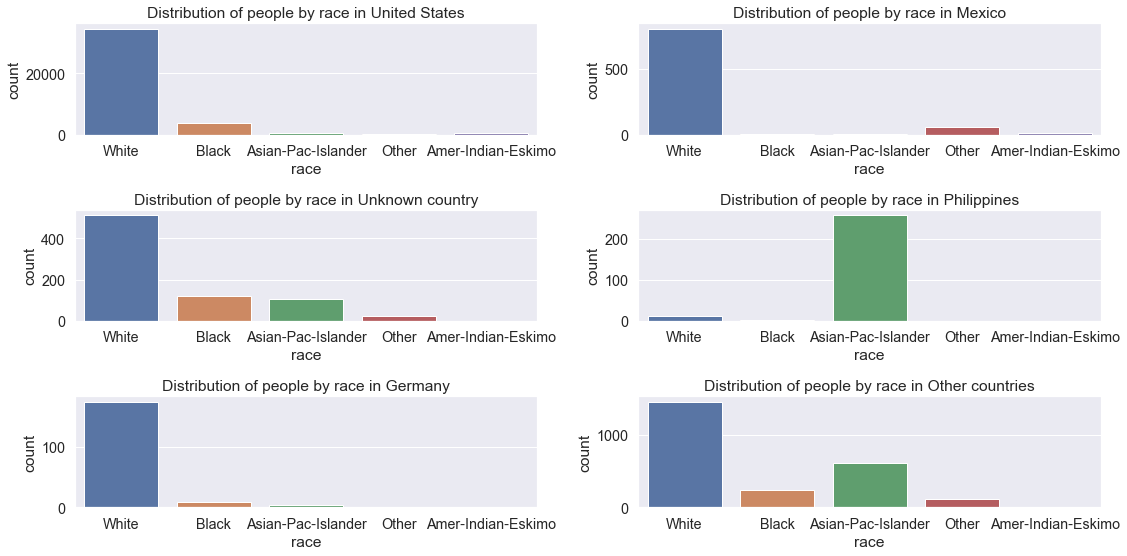

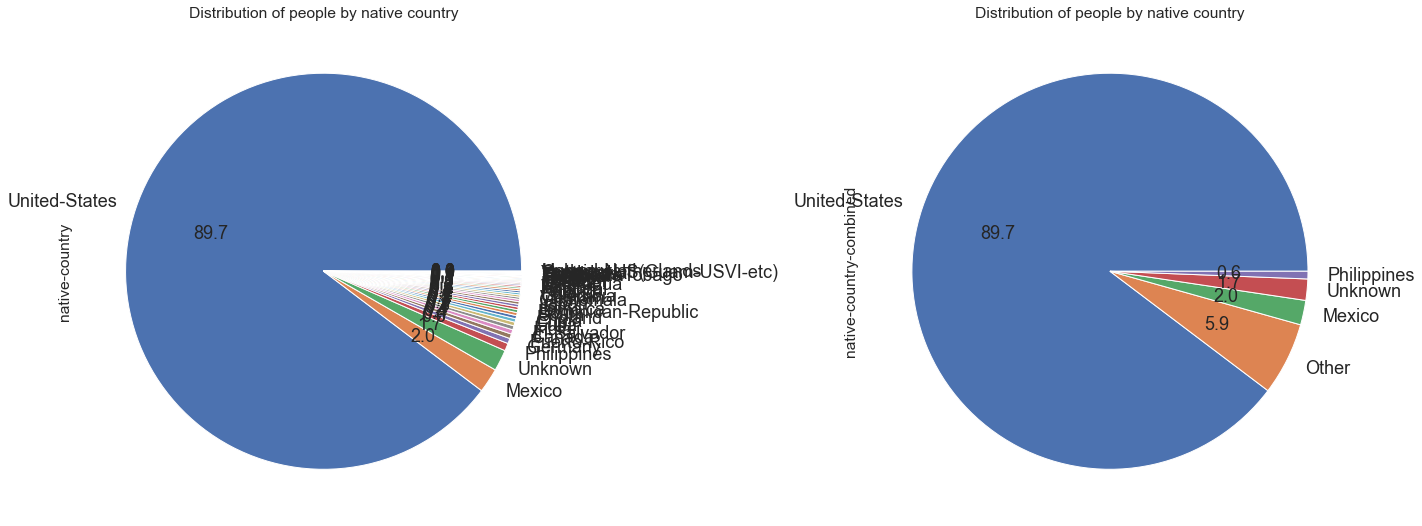

In [5]:
# 10 points
# Task 3-a: Plot the race count for each country
# Think of a way to nicely visualize all the countries! 
#########################begin code for Task 3-a
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
sns.set(font_scale = 1.3)
print("Total unique countries present in our data is:",len(list(df_data['native-country'].unique())))


# To help with the visualizations, we categorzie countries into United-States, Mexico, Philippines, Germany, 
# Unknown & Others (remaining countries)

races_list = list(df_data['race'].unique())

plt.subplot(3, 2, 1)
sns.countplot(data=df_data[df_data['native-country'] == 'United-States'], x="race",order = races_list).set(title='Distribution of people by race in United States')
plt.subplot(3, 2, 2)
sns.countplot(data=df_data[df_data['native-country'] == 'Mexico'], x="race",order = races_list).set(title='Distribution of people by race in Mexico')
plt.subplot(3, 2, 3)
sns.countplot(data=df_data[df_data['native-country'] == 'Unknown'], x="race",order = races_list).set(title='Distribution of people by race in Unknown country')
plt.subplot(3, 2, 4)
sns.countplot(data=df_data[df_data['native-country'] == 'Philippines'], x="race",order = races_list).set(title='Distribution of people by race in Philippines')
plt.subplot(3, 2, 5)
sns.countplot(data=df_data[df_data['native-country'] == 'Germany'], x="race",order = races_list).set(title='Distribution of people by race in Germany')
plt.subplot(3, 2, 6)
sns.countplot(data=df_data[~df_data['native-country'].isin(['United-States','Mexico','Unknown','Philippines','Germany'])], x="race",order = races_list).set(title='Distribution of people by race in Other countries')
plt.tight_layout()

# If needed to plot for all countries I can write the below for loop to plot all countries with 21 X 2 subplot layout

# countries_list = list(df_data['native-country'].unique())
# plt.figure(figsize=(16, 50))
# for i in range(0,len(countries_list)):
#     plt.subplot(21, 2, i + 1)
#     sns.countplot(data=df_data[df_data['native-country'] == countries_list[i]], x="race",order = races_list).set(title='Distribution of people by race in %s' % countries_list[i] )
# plt.tight_layout()

########################end code for Task 3-a

# 20 points
# Task 3-b: Draw a pie chart that represents native country

########################begin code for Task 3-b 

plt.figure(figsize=(20, 20))
# plotting pie chart that shows proportion for each native-country in the data
plt.subplot(1, 2, 1)
df_data['native-country'].value_counts().plot(kind='pie',autopct='%.1f',textprops={'fontsize': 18})
plt.title("Distribution of people by native country")
# The above plot looks very messy, so will combine the countries
plt.subplot(1, 2, 2)
df_data['native-country-combined'] = np.where(df_data['native-country'].isin(['United-States','Mexico','Unknown','Philippines']), df_data['native-country'],'Other')
df_data['native-country-combined'].value_counts().plot(kind='pie',autopct='%.1f',textprops={'fontsize': 18})
plt.title("Distribution of people by native country")
plt.tight_layout()

#########################end code for Task 3-b

# Task 4: 
Find out an 'interesting' information from the dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

### Testing the income distribution by age - Hypothesis that the income increases as the age of people increases

<AxesSubplot:title={'center':'Distribution of Income > 50K by various age groups'}, xlabel='age_group', ylabel='Count'>

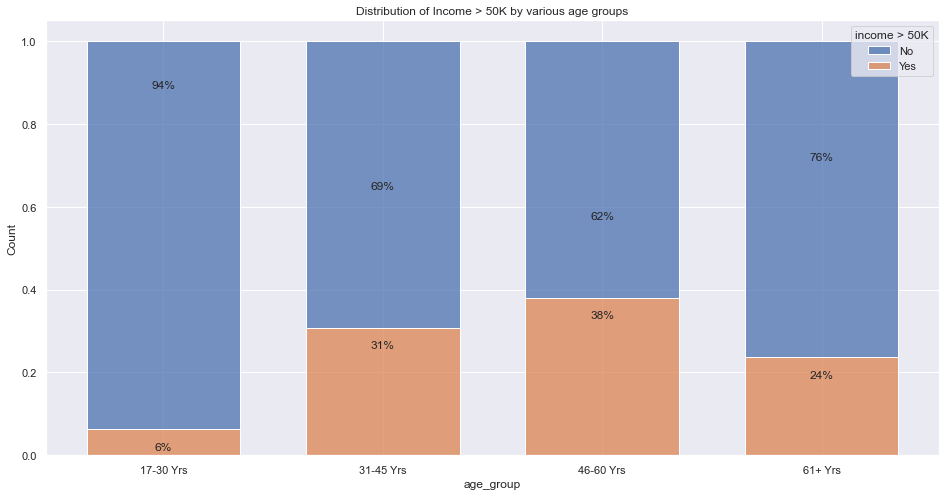

In [6]:
#########################begin code for Task 4
# Binning age variable to create multiple age categories
bins= [17,31,46,61,91]
labels = ['17-30 Yrs','31-45 Yrs','46-60 Yrs','61+ Yrs']
df_data['age_group'] = pd.cut(df_data['age'], bins=bins, labels=labels, right=False)

# creating plot data to look at the distribution of income > 50K by age categories
plot_data = df_data.groupby(['age_group'])['income > 50K'].value_counts(normalize=True).reset_index(name='proportion')

# histogram to show the above distribution 
sns.set(rc={'figure.figsize':(16,8)})
axis = sns.histplot(x = 'age_group' , hue = 'income > 50K',weights= 'proportion',multiple = 'stack',data=plot_data, shrink=0.7)
axis.set(title="Distribution of Income > 50K by various age groups")

# for loop to show the data labels of the %'s in the barplot
for labels in axis.patches:
    height = labels.get_height()
    axis.text(x = labels.get_x()+(labels.get_width()/2),y = height-0.05,s = "{:.0%}".format(height),ha = "center")

axis
#########################end code for Task 4

#### We expect the Income of people should increase as the age increases but we see that the people with income > 50K decrease as the people become 61 years or older. This logically makes sense now as people age beyond 60 years, they start to retire and that reduces their income